Домашнее задание: 
* Добиться вразумительного результата от модели, собранной на занятии (7 угаданныx картинок из 10 предложенных на семинаре). Варианты изменений:
        * изменение слоёв и их количества;
        * изменение метода оптимизации; 
        * изменение процесса обучения; 
        * для продвинутых: преобразование данных transform
* Переписать данный туториал на pytorch: https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ru

In [95]:
from torch import nn 
from torch import optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision
import torch.utils

In [2]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [3]:
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (classes[label])

0it [00:00, ?it/s]Downloading https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ../../data/cifar-10-python.tar.gz
100%|█████████▉| 170393600/170498071 [00:43<00:00, 5051366.20it/s]Extracting ../../data/cifar-10-python.tar.gz to ../../data/
torch.Size([3, 32, 32])
frog


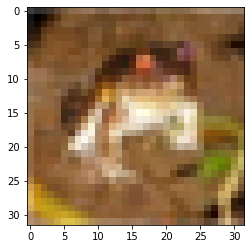

In [4]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [52]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [8]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

479316.80it/s]
100%|█████████▉| 170369024/170498071 [01:47<00:00, 4089706.41it/s]Extracting ./data\cifar-10-python.tar.gz to ./data


In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to('cpu')

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [11]:
for epoch in range(10):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:   
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.001

170500096it [01:57, 4089706.41it/s]                               [1,   301] loss: 0.346
[1,   601] loss: 0.345
[2,     1] loss: 0.001
[2,   301] loss: 0.344
[2,   601] loss: 0.342
[3,     1] loss: 0.001
[3,   301] loss: 0.328
[3,   601] loss: 0.322
[4,     1] loss: 0.001
[4,   301] loss: 0.302
[4,   601] loss: 0.295
[5,     1] loss: 0.001
[5,   301] loss: 0.285
[5,   601] loss: 0.279
[6,     1] loss: 0.001
[6,   301] loss: 0.266
[6,   601] loss: 0.260
[7,     1] loss: 0.001
[7,   301] loss: 0.251
[7,   601] loss: 0.247
[8,     1] loss: 0.001
[8,   301] loss: 0.240
[8,   601] loss: 0.239
[9,     1] loss: 0.001
[9,   301] loss: 0.234
[9,   601] loss: 0.232
[10,     1] loss: 0.001
[10,   301] loss: 0.227
[10,   601] loss: 0.227
Training is finished!


In [12]:
PATH = './cifar_net_version_test_intro.pth'
torch.save(net.state_dict(), PATH)

In [13]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [14]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:    cat  ship  ship plane


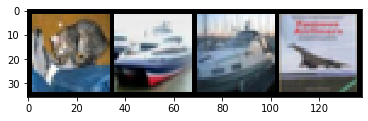

In [15]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

## -Изменение слоёв и их количества

In [81]:
class Net_layer(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        # x = F.relu(self.fc3(x))
        x = self.fc2(x)
        return x


In [126]:
def training_model(model, optimizer, train_data, test_loss_history, num_epoch=10, criterion = nn.CrossEntropyLoss()):
    for epoch in range(num_epoch):  
        running_loss = 0.0
        for i, data in enumerate(train_data, 0):
            inputs, labels = data
            # обнуляем градиент
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # выводим статистику о процессе обучения
            running_loss += loss.item()
            if i % 300 == 299:   
                loss = running_loss / 2000
                test_loss_history.append(loss)
                print('[%d, %5d] loss: %.3f' %
                     (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Training is finished!')

In [78]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [129]:
model = Net_layer().to('cpu')
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
test_loss_history = []
training_model(model, optimizer, train_loader, test_loss_history, 10)

[1,   300] loss: 0.345
[1,   600] loss: 0.342
[2,   300] loss: 0.316
[2,   600] loss: 0.302
[3,   300] loss: 0.292
[3,   600] loss: 0.282
[4,   300] loss: 0.267
[4,   600] loss: 0.256
[5,   300] loss: 0.243
[5,   600] loss: 0.236
[6,   300] loss: 0.231
[6,   600] loss: 0.227
[7,   300] loss: 0.223
[7,   600] loss: 0.221
[8,   300] loss: 0.217
[8,   600] loss: 0.215
[9,   300] loss: 0.211
[9,   600] loss: 0.209
[10,   300] loss: 0.207
[10,   600] loss: 0.208
Training is finished!


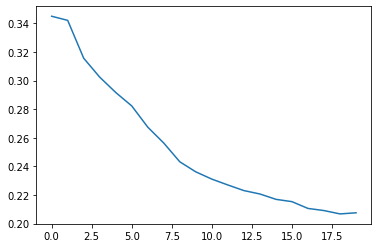

In [130]:
plt.plot(test_loss_history);

In [131]:
model = Net().to('cpu')
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
test_loss_history = []
training_model(model, optimizer, train_loader, test_loss_history, 10)

[1,   300] loss: 0.345
[1,   600] loss: 0.345
[2,   300] loss: 0.344
[2,   600] loss: 0.341
[3,   300] loss: 0.327
[3,   600] loss: 0.319
[4,   300] loss: 0.311
[4,   600] loss: 0.307
[5,   300] loss: 0.299
[5,   600] loss: 0.295
[6,   300] loss: 0.285
[6,   600] loss: 0.275
[7,   300] loss: 0.263
[7,   600] loss: 0.258
[8,   300] loss: 0.248
[8,   600] loss: 0.242
[9,   300] loss: 0.236
[9,   600] loss: 0.235
[10,   300] loss: 0.228
[10,   600] loss: 0.227
Training is finished!


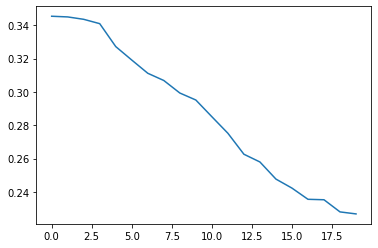

In [132]:
plt.plot(test_loss_history);

## - изменение метода оптимизации

In [133]:
model = Net_layer().to('cpu')
optimizer = optim.Adam(model.parameters(), lr=0.001)
test_loss_history = []
training_model(model, optimizer, train_loader, test_loss_history, 10)

[1,   300] loss: 0.293
[1,   600] loss: 0.243
[2,   300] loss: 0.220
[2,   600] loss: 0.215
[3,   300] loss: 0.203
[3,   600] loss: 0.201
[4,   300] loss: 0.192
[4,   600] loss: 0.189
[5,   300] loss: 0.185
[5,   600] loss: 0.181
[6,   300] loss: 0.176
[6,   600] loss: 0.176
[7,   300] loss: 0.169
[7,   600] loss: 0.170
[8,   300] loss: 0.165
[8,   600] loss: 0.164
[9,   300] loss: 0.161
[9,   600] loss: 0.162
[10,   300] loss: 0.156
[10,   600] loss: 0.160
Training is finished!


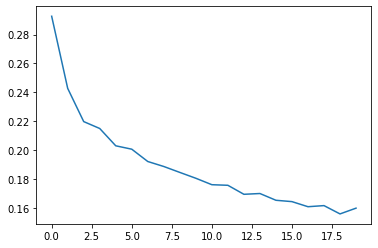

In [134]:
plt.plot(test_loss_history);

## -изменение процесса обучения;

## - для продвинутых: преобразование данных transform


In [136]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [137]:
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True,  
                                             transform=transform, 
                                             download=False)

In [138]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [139]:
model = Net().to('cpu')
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
test_loss_history = []
training_model(model, optimizer, train_loader, test_loss_history, 10)

[1,   300] loss: 0.345
[1,   600] loss: 0.344
[2,   300] loss: 0.326
[2,   600] loss: 0.307
[3,   300] loss: 0.284
[3,   600] loss: 0.272
[4,   300] loss: 0.254
[4,   600] loss: 0.246
[5,   300] loss: 0.239
[5,   600] loss: 0.233
[6,   300] loss: 0.226
[6,   600] loss: 0.224
[7,   300] loss: 0.217
[7,   600] loss: 0.215
[8,   300] loss: 0.210
[8,   600] loss: 0.208
[9,   300] loss: 0.203
[9,   600] loss: 0.201
[10,   300] loss: 0.196
[10,   600] loss: 0.193
Training is finished!


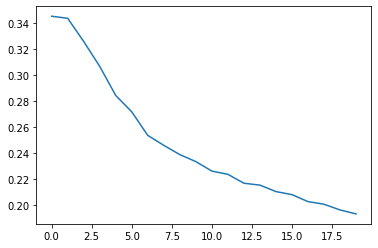

In [140]:
plt.plot(test_loss_history);

## - Переписать данный туториал на pytorch: https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ru

In [142]:
MNIST_train = torchvision.datasets.MNIST('../../data/', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('../../data/', download=True, train=False)



0it [00:00, ?it/s]Downloading http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz to ../../data/MNIST\raw\train-images-idx3-ubyte.gz


  0%|          | 0/9912422 [00:00<?, ?it/s]

  0%|          | 16384/9912422 [00:00<01:30, 109139.17it/s]

  0%|          | 49152/9912422 [00:00<01:13, 134421.16it/s]

  1%|          | 98304/9912422 [00:00<00:57, 169561.50it/s]

  2%|▏         | 212992/9912422 [00:01<00:43, 224260.80it/s]

  4%|▍         | 434176/9912422 [00:01<00:30, 306465.54it/s]

  5%|▌         | 532480/9912422 [00:01<00:24, 380927.47it/s]

  7%|▋         | 663552/9912422 [00:01<00:19, 474484.68it/s]

  8%|▊         | 835584/9912422 [00:01<00:15, 601102.49it/s]

 10%|█         | 999424/9912422 [00:01<00:12, 732844.64it/s]

 12%|█▏        | 1171456/9912422 [00:01<00:10, 866897.64it/s]

 14%|█▎        | 1343488/9912422 [00:01<00:08, 997965.02it/s]

 15%|█▌        | 1523712/9912422 [00:01<00:07, 1117844.68it/s]

 17%|█▋        | 1703936/9912422 [00:02<00:06, 1218185.53it/s]

 

In [143]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

In [144]:
X_train = X_train.float()
X_test = X_test.float()

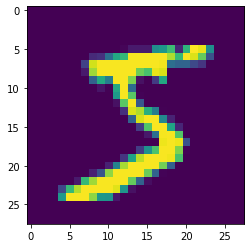

tensor(5)


In [145]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [146]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [148]:
class MNISTNet(torch.nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, 128)
        self.ac1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(128, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet()

In [149]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [150]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

for epoch in range(10):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9369)
tensor(0.9494)
tensor(0.9477)
tensor(0.9505)
tensor(0.9538)
tensor(0.9618)
tensor(0.9590)
tensor(0.9614)
tensor(0.9611)
tensor(0.9586)


In [194]:
out_predict = mnist_net(X_test[23])
max_elements, max_idxs = torch.max(out_predict, dim=0)
print(max_elements)
print(max_idxs)

tensor(33.5065, grad_fn=<MaxBackward0>)
tensor(5)


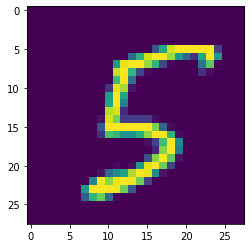

tensor(5)


In [195]:
test_pain = MNIST_test.test_data.float()
plt.imshow(test_pain[23, :, :])
plt.show()
print(y_train[0])